# Assignment 20.11.17 - Patrick Werner

## Exercise 1
![Mindmap](mindmap.png)

## Exercise 2

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as cls
import seaborn as sns
import sklearn.svm as svm
import sklearn.datasets as ds

# Prettier plots
sns.set()

# Save plots as vector graphics
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')
#set_matplotlib_formats('pdf', 'png') # too much for scatter
sns.set(rc={"savefig.dpi" : 75,
            "figure.figsize" : [10, 8]})

# Use latex for plot texts
#sns.set(font_scale=1.5, rc={"text.usetex" : True,
#            "font.family" : "serif",
#            "font.serif" : "cm"})

### a)
Lowest order polynomial: Quadratic Function (2)

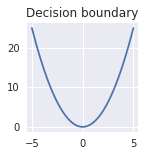

In [2]:
x = np.linspace(-5,5,100)
plt.figure(figsize=(2,2))
plt.plot(x, x**2)
plt.title("Decision boundary")
plt.show()

### b)
Lowest order polynomial: Cubic Function (3)

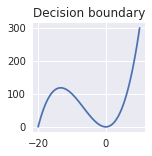

In [3]:
x = np.linspace(-20,10,100)
plt.figure(figsize=(2,2))
plt.plot(x, 0.1*x**3+2*x**2)
plt.title("Decision boundary")
plt.show()

### c)
Lowest order polynomial: Linear Function (1)

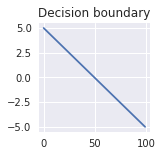

In [4]:
x = np.linspace(-5,5,100)
plt.figure(figsize=(2,2))
plt.plot(-x)
plt.title("Decision boundary")
plt.show()

If you wanted to classify the data sets (a), (b), (c) using SVM’s with Gaussian basis functions, how many hidden layer neurons would you need for each problem?

SVMs do not have any hidden layers or even neurons as they are not artificial neural networks. Instead of hidden layers they exploit a high-dimensional feature space.

## Exercise 3

In [5]:
def makeMoonsParametrized(nSamples, radius, width, d, **kwargs):
    # 1 sample consists of a pair of A and B
    nSamples *= 2 
    
    # Get moons 
    moons, inds = ds.make_moons(nSamples, shuffle = False, noise = kwargs.get("noise"))
        
    # Extract moons
    moonA = moons[inds == 0]
    moonB = moons[inds == 1]

    # Move moon B to origin
    moonB[:,0] -= 1
    moonB[:,1] -= 0.5

    # Apply radius and width
    moonA *= radius
    moonA *= np.random.uniform((radius - width/2)/radius, (radius + width/2)/radius, moonA.shape)
    moonB *= radius
    moonB *= np.random.uniform((radius - width/2)/radius, (radius + width/2)/radius, moonB.shape)

    # Move moon B back
    moonB[:,0] += radius
    moonB[:,1] -= d
    
    moons = np.append(moonA, moonB, 0)
    
    # Shuffle dataset, assumes inds is unshuffled (neccessary?)
    rngState = np.random.get_state()
    np.random.shuffle(moons)
    np.random.set_state(rngState)
    np.random.shuffle(inds)
    
    return moons, inds

In [6]:
def classifyAndPlotMoons(title, nTrainSamples, nTestSamples, radius, width, d, **kwargs):
    # Display horizontally next to each other
    fig, axArr = plt.subplots(1, 4, figsize=(16,4))
    
    plt.suptitle(title)
    
    # Create training set
    trainMoons, trainIndices = makeMoonsParametrized(nTrainSamples, radius, width, d, noise = kwargs.get("noise"))

    # Create test set
    testMoons, testIndices = makeMoonsParametrized(nTestSamples, radius, width, d, noise = kwargs.get("noise"))

    # Plot test set
    a = testMoons[testIndices==0]
    b = testMoons[testIndices==1]
    axArr[0].scatter(a[:,0], a[:,1])
    axArr[0].scatter(b[:,0], b[:,1])
    axArr[0].set_title("ground truth")
    
    subplotN = 1
    # Try each kernel
    for kernel in ("linear", "poly", "rbf"):
        C = 1.0
        if kwargs.get("C") is not None:
            C = kwargs.get("C")
        probability = False
        if kwargs.get("probability") is not None:
            probability = kwargs.get("probability")
        
        # Create SVM
        clf = svm.SVC(kernel=kernel, C = C, probability = probability)
        
        # Train SVM
        clf.fit(trainMoons, trainIndices);

        # Test SVM
        result = clf.predict(testMoons)
        
        # Plot results
        a = testMoons[result==0]
        b = testMoons[result==1]
        m = testMoons[result != testIndices]
        axArr[subplotN].scatter(a[:,0], a[:,1], label="A")
        axArr[subplotN].scatter(b[:,0], b[:,1], label="B")
        axArr[subplotN].scatter(m[:,0], m[:,1], label="misclassified")
        axArr[subplotN].set_title(kernel + " kernel")

        subplotN += 1

    # Make space for suptitle
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.legend()
    plt.show()

In [7]:
# Constant parameters
radius = 10
width = 6
nTrainSamples = 1000
nTestSamples = 3000

### Case 1

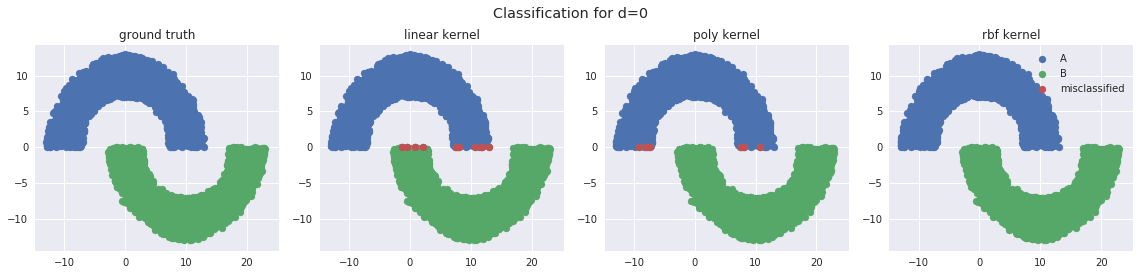

In [8]:
d = 0
classifyAndPlotMoons("Classification for d=" + str(d), nTrainSamples, nTestSamples, radius, width, d)

### Case 2

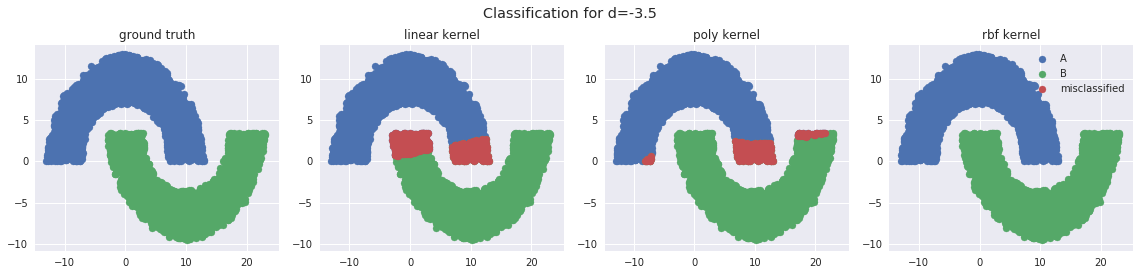

In [9]:
d = -(radius - width/2)/2
classifyAndPlotMoons("Classification for d=" + str(d), nTrainSamples, nTestSamples, radius, width, d)

### Case 3

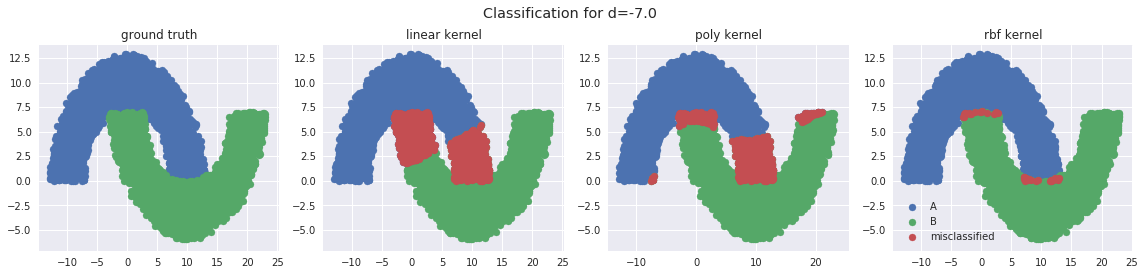

In [10]:
d = -(radius - width/2)
classifyAndPlotMoons("Classification for d=" + str(d), nTrainSamples, nTestSamples, radius, width, d)

### Case 4

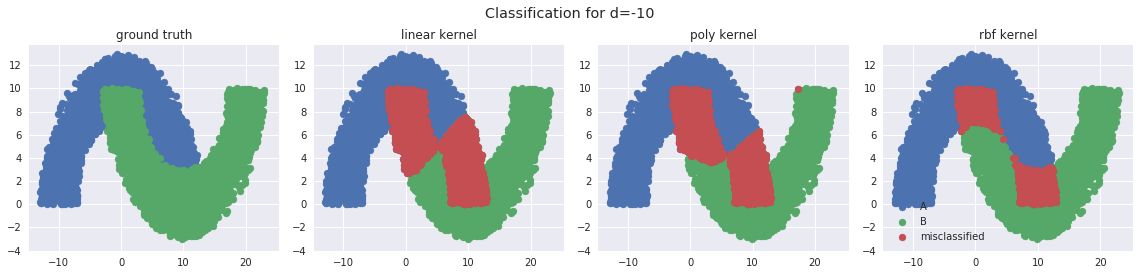

In [11]:
d = -radius
classifyAndPlotMoons("Classification for d=" + str(d), nTrainSamples, nTestSamples, radius, width, d)

### Case 5

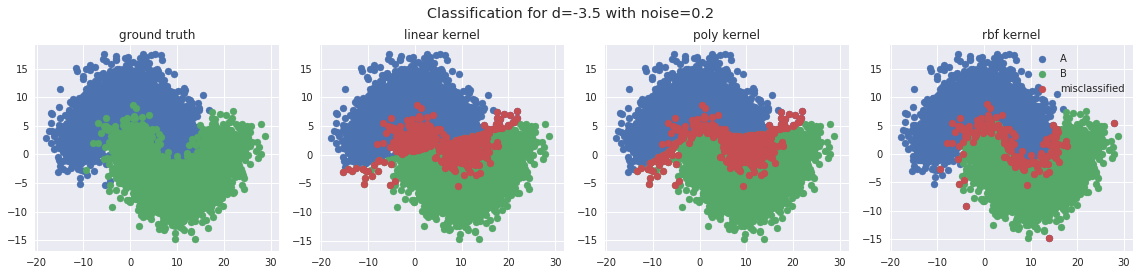

In [12]:
d = -(radius - width/2)/2
noise = 0.2
classifyAndPlotMoons("Classification for d=" + str(d) + " with noise=" + str(noise), nTrainSamples, nTestSamples, radius, width, d, noise=noise)

### Experimentation

In [13]:
nTrainSamples = 200
nTestSamples = 400

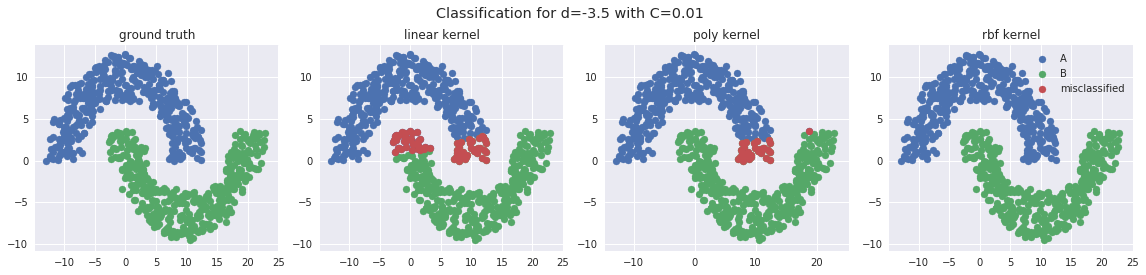

In [14]:
d = -(radius - width/2)/2
C = 0.01
classifyAndPlotMoons("Classification for d=" + str(d) + " with C=" + str(C), nTrainSamples, nTestSamples, radius, width, d, C = C)

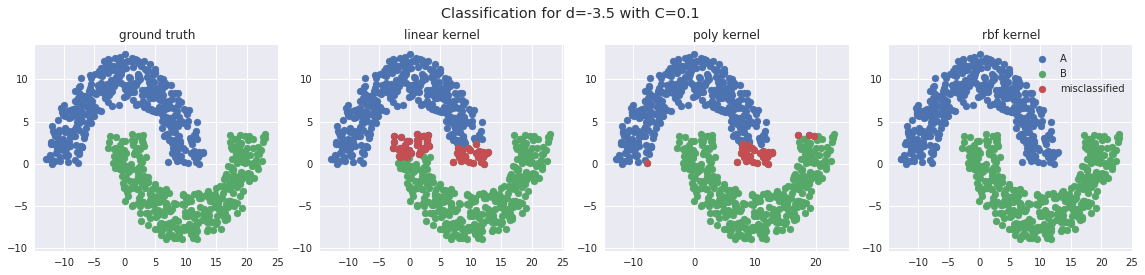

In [15]:
d = -(radius - width/2)/2
C = 0.1
classifyAndPlotMoons("Classification for d=" + str(d) + " with C=" + str(C), nTrainSamples, nTestSamples, radius, width, d, C = C)

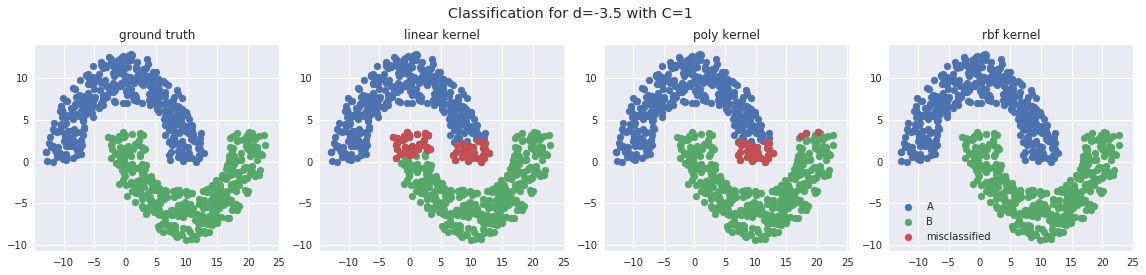

In [16]:
d = -(radius - width/2)/2
C = 1
classifyAndPlotMoons("Classification for d=" + str(d) + " with C=" + str(C), nTrainSamples, nTestSamples, radius, width, d, C = C)

In [17]:
d = -(radius - width/2)/2
C = 10
classifyAndPlotMoons("Classification for d=" + str(d) + " with C=" + str(C), nTrainSamples, nTestSamples, radius, width, d, C = C)

The C parameter supplied by scikit-learn seems to have minimal effect.

The probability parameter enables probability estimates. During testing with different d values (not shown), it had no noticable effect on the results, except for significantly increased processing time.

## Exercise 4

Questions are provided in a separate textfile.